<a href="https://colab.research.google.com/github/Anshuldogra001/LGM_internship/blob/main/Task2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name- Abhinav Dogra
#Task 4- To Exploratory data Analytics - terrorism
#VIP@ LetsGrowMore
* To perform ‘Exploratory Data Analysis’ on dataset 'globalterrorismdb_0718dist.csv’.

* As a defense analyst try to find out the hot zone of terrorism.

* What all security issues you can derive from the EDA.

* We are going to use python 

In [1]:
# Import all necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
s_data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
s_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:

s_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
 #I'm just take important data in whole dataset those I'm using further processing.
terror=s_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [9]:
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
terror.duplicated().sum()

9498

In [12]:
terror.drop_duplicates()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [13]:
terror.cov()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,175.812496,0.006242,2.133346,40.951530,1.059590e+04,2.292652,7.019333
Month,0.006242,11.480600,0.164158,-1.005279,-2.692110e+03,0.135442,0.357870
Day,2.133346,0.164158,77.687385,0.559877,-4.120870e+03,-0.375477,-0.401569
latitude,40.951530,-1.005279,0.559877,344.816764,5.564253e+03,-3.822593,10.634340
longitude,10595.897714,-2692.109846,-4120.870170,5564.252921,4.193443e+10,-1358.855169,1740.424297
Killed,2.292652,0.135442,-0.375477,-3.822593,-1.358855e+03,133.304125,188.711482
Wounded,7.019333,0.357870,-0.401569,10.634340,1.740424e+03,188.711482,1292.358771


In [14]:
terror.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [15]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


#Let's Visualize the data

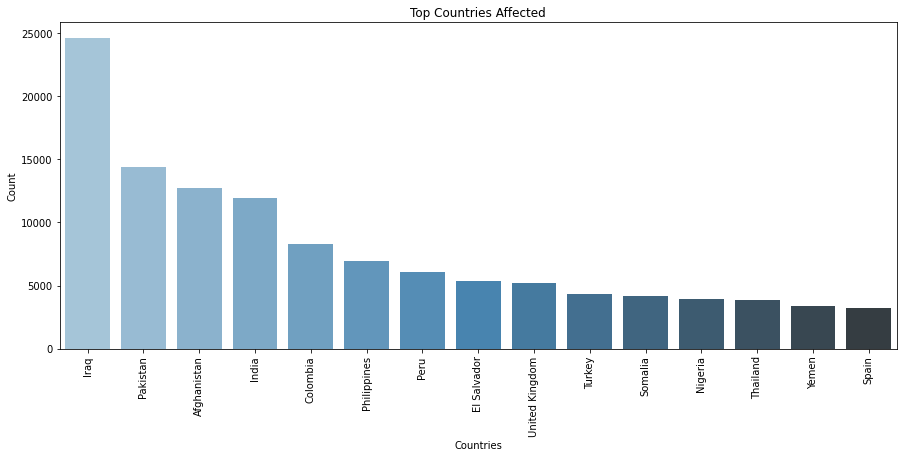

In [16]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

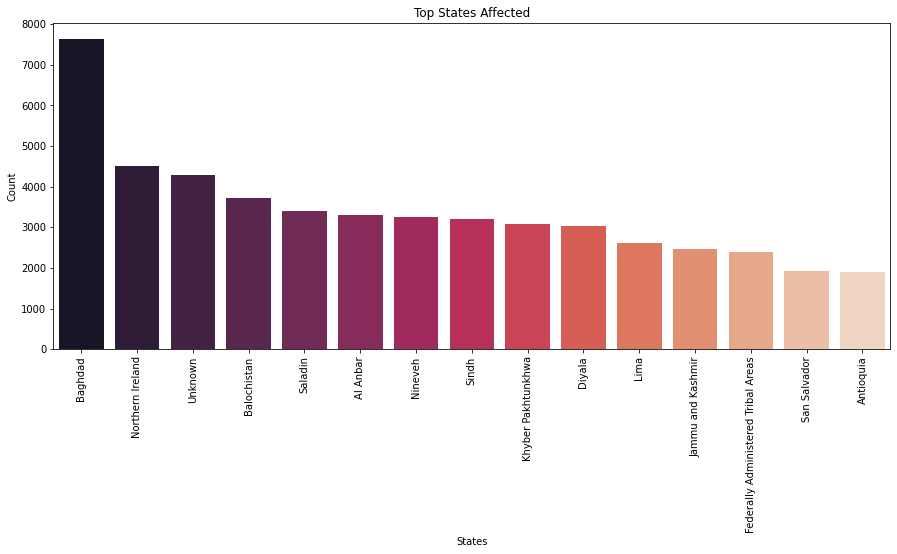

In [17]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['state'].value_counts()[:15].index,terror['state'].value_counts()[:15].values,palette='rocket')
plt.title('Top States Affected')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

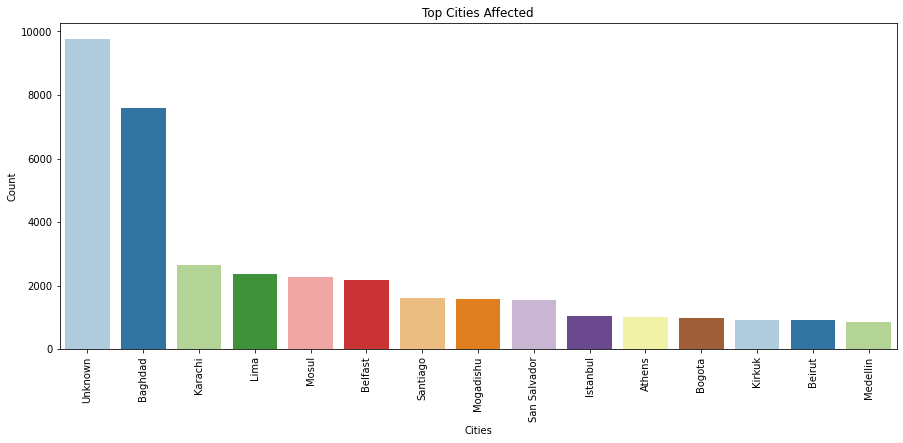

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['city'].value_counts()[:15].index,terror['city'].value_counts()[:15].values,palette='Paired')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

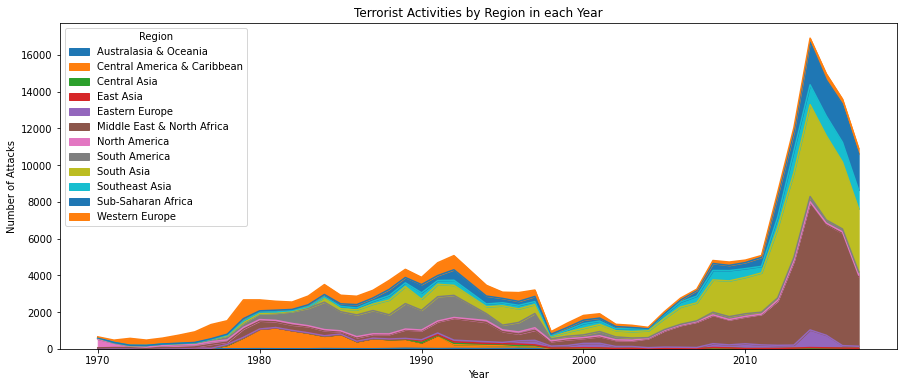

In [19]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

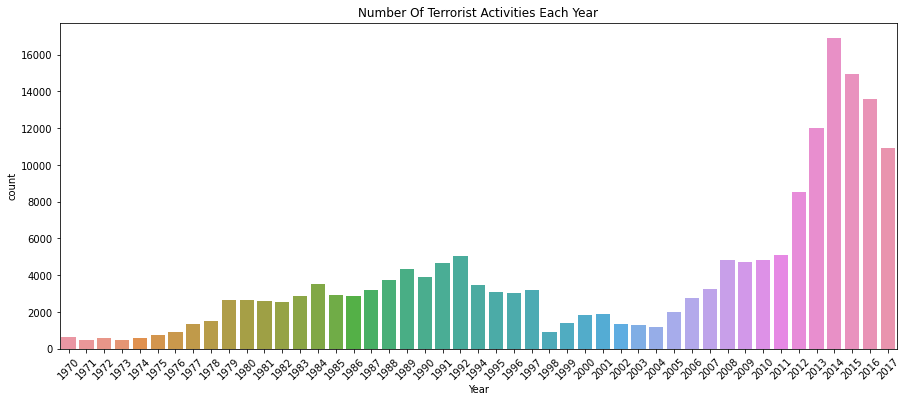

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

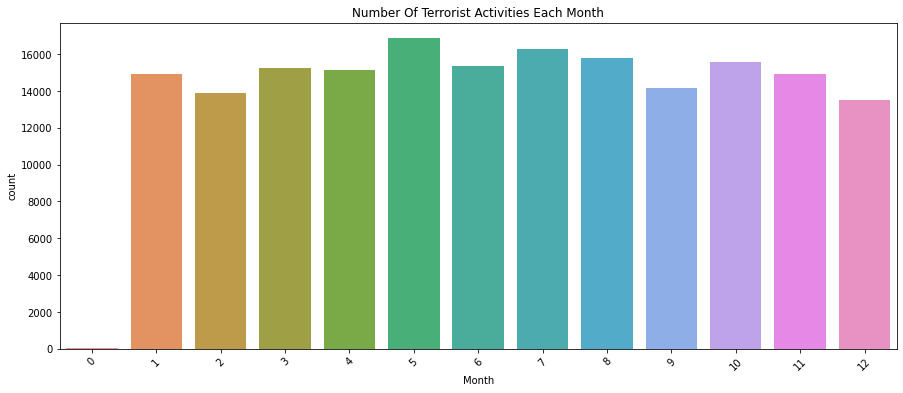

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('Month',data=terror)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Month')
plt.show()

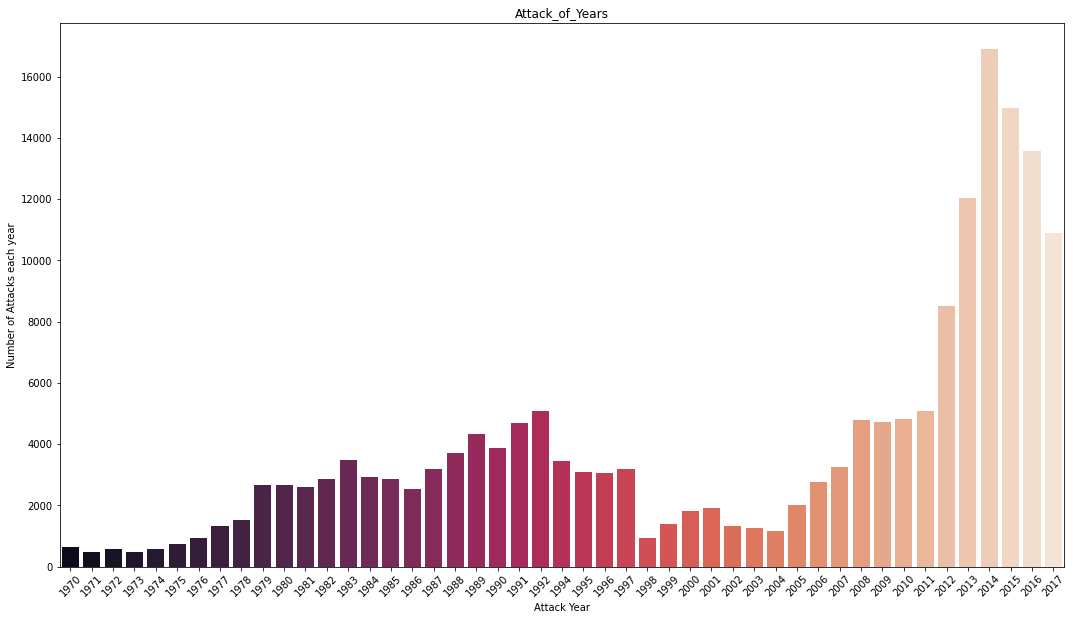

In [22]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

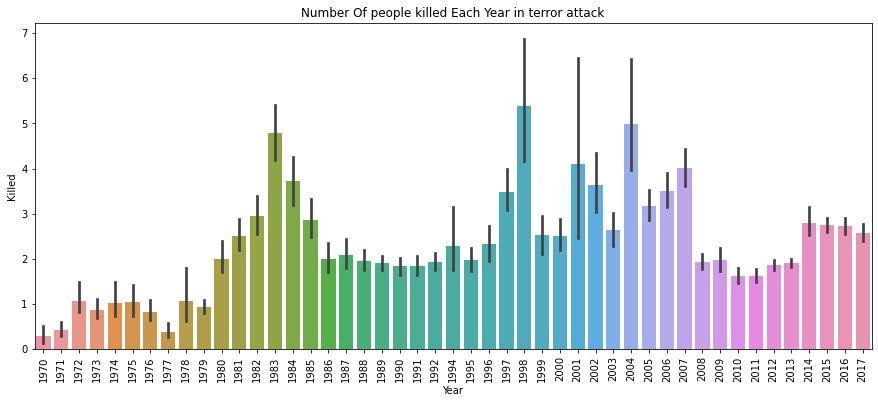

In [23]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year',y='Killed',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of people killed Each Year in terror attack')
plt.show()

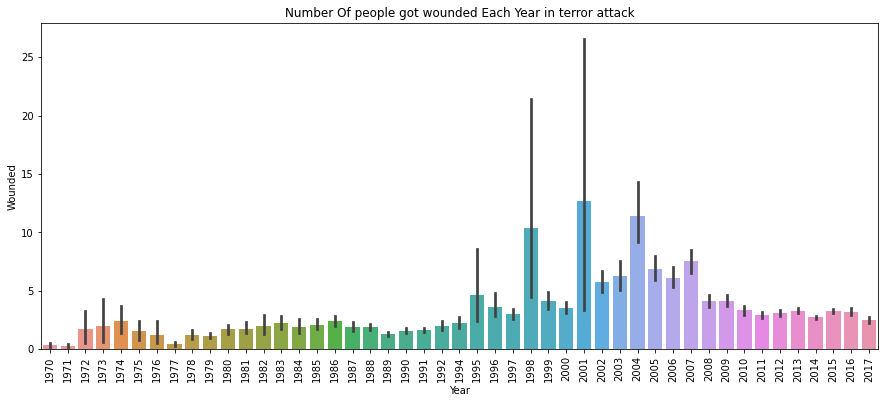

In [24]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year',y='Wounded',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of people got wounded Each Year in terror attack')
plt.show()

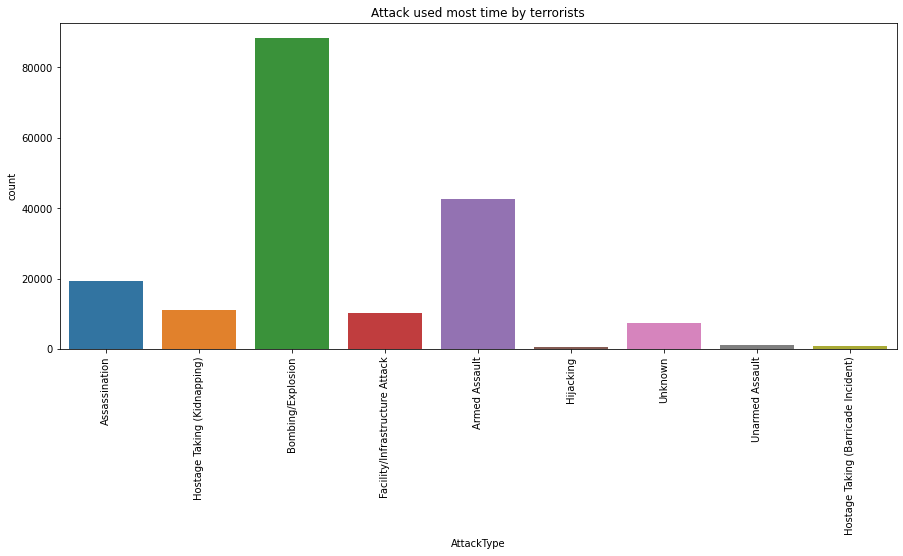

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror)
plt.xticks(rotation=90)
plt.title('Attack used most time by terrorists')
plt.show()

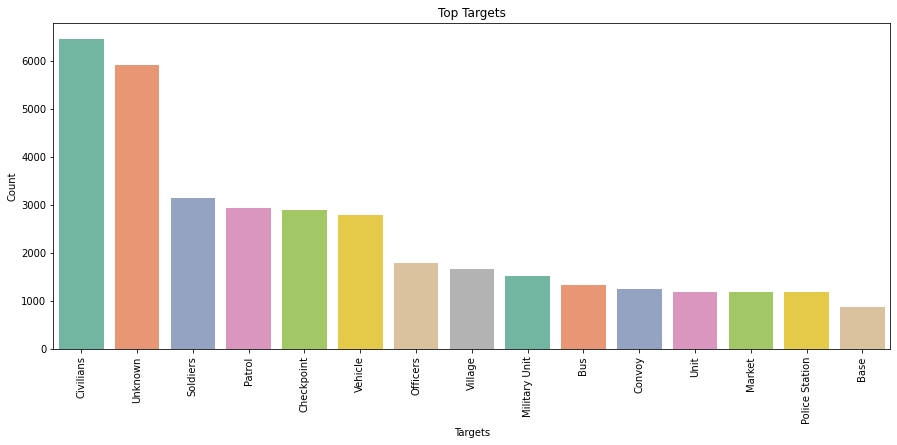

In [26]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Target'].value_counts()[:15].index,terror['Target'].value_counts()[:15].values,palette='Set2')
plt.title('Top Targets')
plt.xlabel('Targets')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

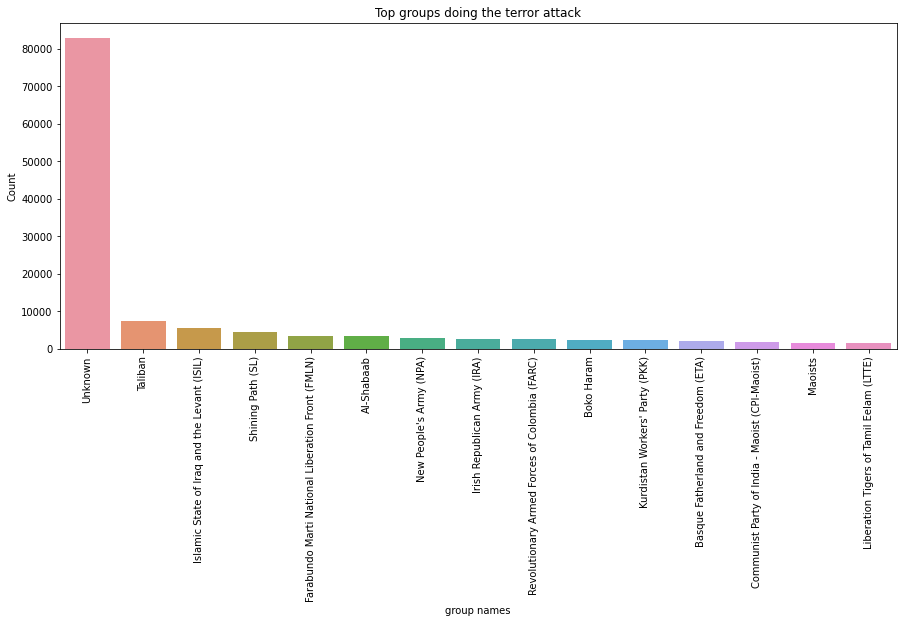

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Group'].value_counts()[:15].index,terror['Group'].value_counts()[:15].values)
sns.color_palette("rocket", as_cmap=True)
plt.title('Top groups doing the terror attack')
plt.xlabel('group names')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

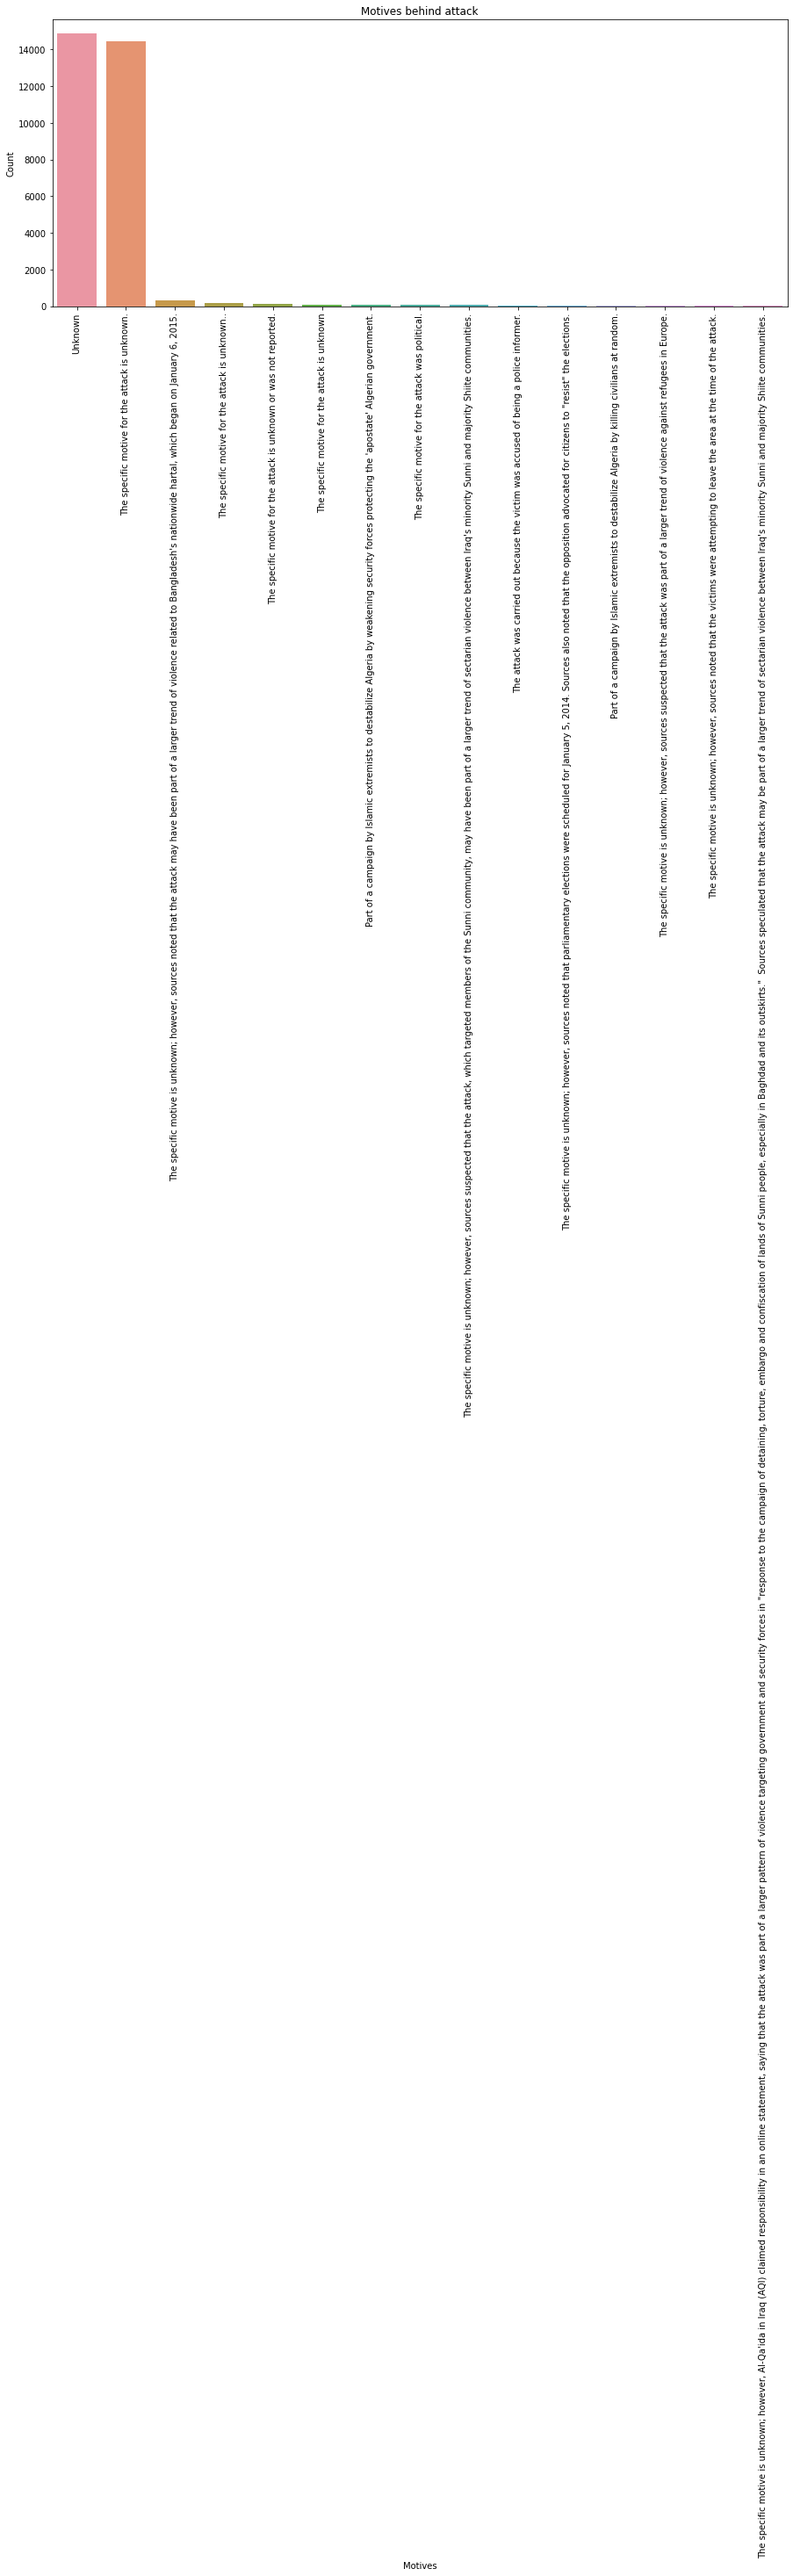

In [28]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Motive'].value_counts()[:15].index,terror['Motive'].value_counts()[:15].values)
sns.color_palette("mako", as_cmap=True)
plt.title('Motives behind attack')
plt.xlabel('Motives')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

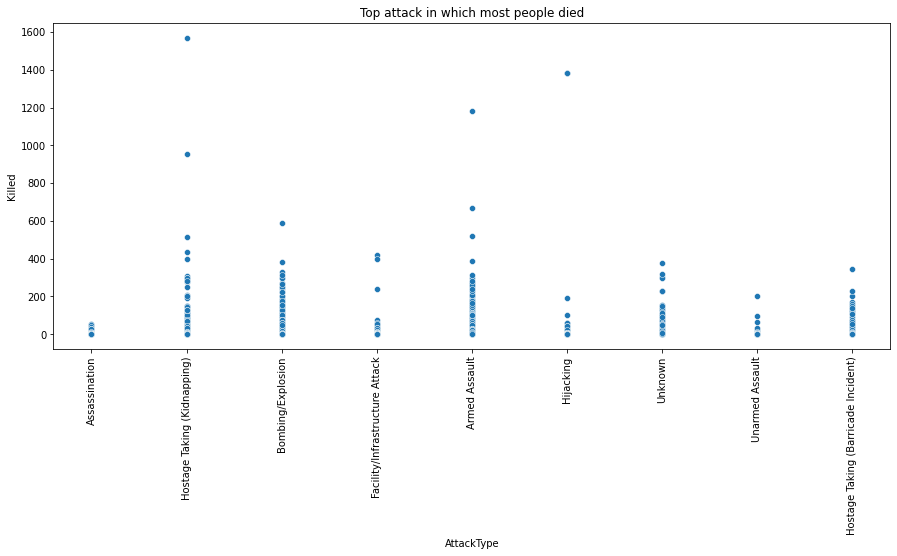

In [29]:
plt.subplots(figsize=(15,6))
sns.scatterplot(x='AttackType',y='Killed',data=terror)
plt.xticks(rotation=90)
plt.title('Top attack in which most people died')
plt.show()

After analysing the data I came to conclusion that,
* Iraq is hot zone of terrorism And in Iraq Baghdad is the hot zone.
* Main target are civilians and attack type used most time is bombing/Explosition.
* In 1998 max people were killed by terrorists.
* Most attack take place in 2014.

We can say, the loop holes are in 

* the border areas from where the explosive materials and illegal stuff is smuggled in the country.

* the security check post in most busy public zones.





#Thank you